<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #1: ES models

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 

This practice task is desinged for impriving knowledge of ES models and getting aqcuainted with time series analysis (with python pandas).

The task should take about 3-5 hours to be completed.

<h1 align="center">1. Reading data (10%)</h1>

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)
     - 2) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> (105 TS of goods sales in shop #36 of one real Retail Net, each TS correspond to an item in shop )
     - 3) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> (105 TS of goods sales in shop #42 of one real Retail Net, each TS correspond to an item in shop)
     - 4) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>(110 TS of goods sales in shop #6 of one real Retail Net, each TS correspond to an item in shop)
 
 All data you can find by <a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link</a> 
 
 
 * For each data set: 
      - 1) learn it's structure in csv-file and read it into Pandas data frame (be careful with parsing data)
      - 2) plot time series (for data sets with a lot of TS you need to plot integral sales of all items in shop)
      - 3) answer the questions: is there seasonlaity, trend, changes in level in TS? If there is seasonality then define period of seasonality. 

/home/david/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


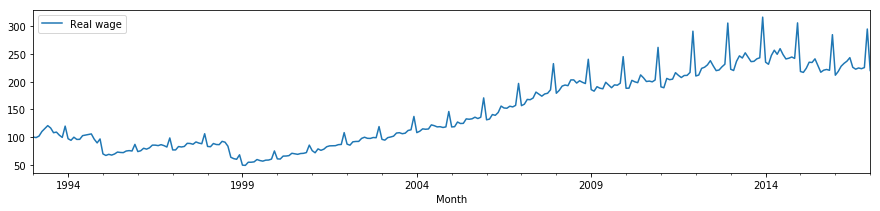

In [1]:
# start with this code
import pandas as pd
import numpy as np
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE
# from utils import ExponentialSmoothing
import statsmodels.api as sm

%matplotlib inline


ts = pd.read_csv('./data/monthly-wage.csv', sep=';', decimal='.', index_col='Month', parse_dates=True, dayfirst=True)
ts = ts.fillna(0)
# Put your code below
ts.plot(figsize=(15,3))

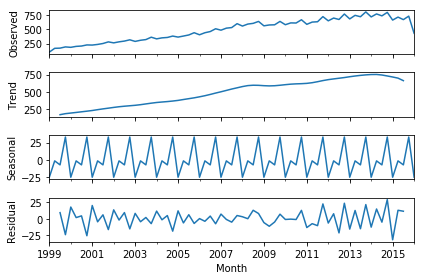

In [2]:
res = sm.tsa.seasonal_decompose(ts['Real wage'].loc['1999-02':'2016-02'].resample('Q').sum())
resplot = res.plot()

There are no level changes but there is a trend. The seasonality is 1 year.

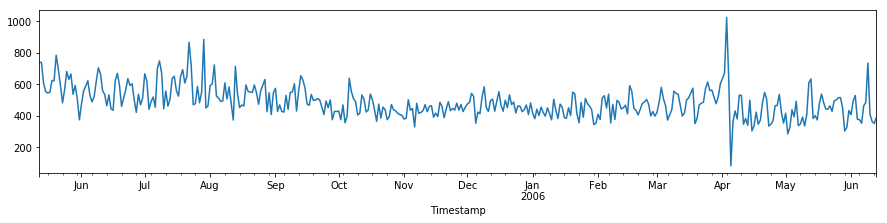

In [3]:
ts_dep36 = pd.read_csv('./data/TS_dep36.csv', sep=';', decimal=',', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts_dep36.fillna(0)
ts_dep36 = ts_dep36.sum(axis=1)

# Put your code below
ts_dep36.plot(figsize=(15,3))

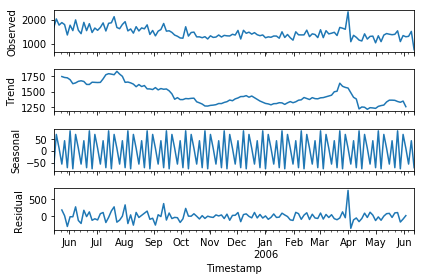

In [4]:
res = sm.tsa.seasonal_decompose(ts_dep36.loc['15-05-2005':'15-06-2006'].resample('3D').sum())
resplot = res.plot()

There are no level changes but there is a reduction trend. The seasonality is 1 about a month.

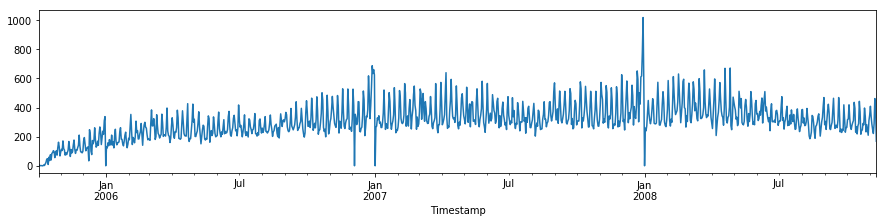

In [5]:
ts_dep42 = pd.read_csv('./data/TS_dep42.csv', sep=';', decimal=',', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts_dep42.fillna(0)
ts_dep42 = ts_dep42.sum(axis=1)

# Put your code below
ts_dep42.plot(figsize=(15,3))

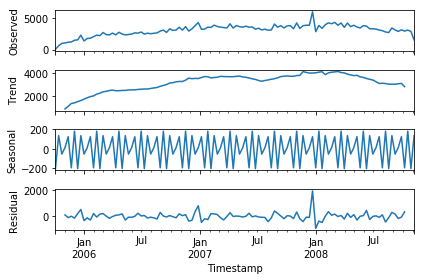

In [6]:
res = sm.tsa.seasonal_decompose(ts_dep42.loc['2005-10-03':'2008-11-10'].resample('10D').sum())
resplot = res.plot()

Seasonality is about 3 months

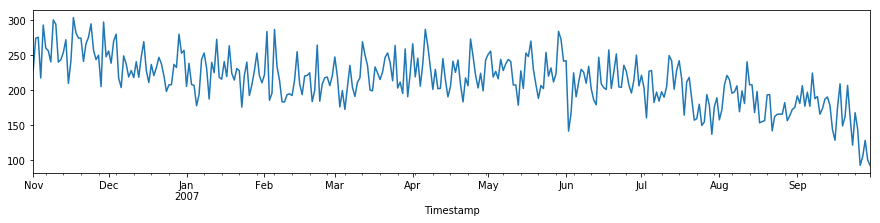

In [7]:
ts_dep6 = pd.read_csv('./data/TS_dep6.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts_dep6.dropna()
ts_dep6 = ts_dep6.sum(axis=1)

# Put your code below
ts_dep6.plot(figsize=(15,3))

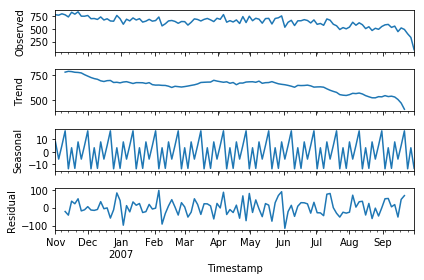

In [8]:
res = sm.tsa.seasonal_decompose(ts_dep6.loc['2006-11-01':'2007-09-30'].resample('3D').sum())
resplot = res.plot()

There is a reducing trend and the seasonality is about 20 days

In [9]:
def ExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    t0=0
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
            y = y*(1-alpha) + alpha*x[t]
            #else do not nothing
        FORECAST[t+h] = y
    return FORECAST

<h1 align="center">2. Apply Simple ES to data with trend and Seasonality (15%) </h1>
You need to apply SES (IES see seminar 2) model for TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

 * 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You can choose any loss function from seminar 2).
 * 2) Draw forecast with optimial value $\alpha$ for data from 09.1998 to 01.2017. Conclude whether SES can be used for this TS? If can not than explain why.
 * 3) Calculate accuracy of the forecast of TS in [02.2016, 01.2017].
 * 4) Aggregate original TS by Years (time step chould be 1 year). Repeat point 1)-2) for aggregated TS.

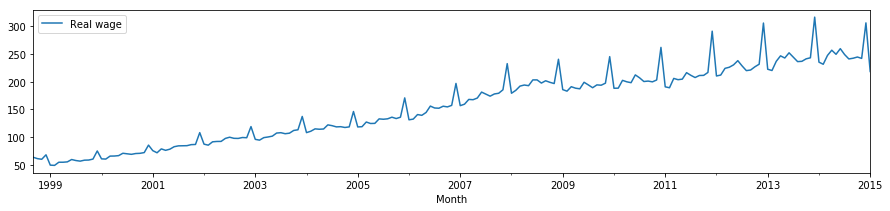

In [10]:
data = ts['1998-09-01':'2015-01-01']
data.plot(figsize=(15,3))

In [11]:
from datetime import datetime, timedelta
import math
import matplotlib.pyplot as plt

In [12]:
h = 1
ALPHA = [0.75, 0.7, 0.65, 0.45, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01]
FRC_TS = dict()

for alpha in ALPHA:
    frc_ts = pd.DataFrame(index = data.index.append(pd.date_range(ts.index[-1]+timedelta(1)
                                                                  , ts.index[-1]+timedelta(h)))
                          , columns = data.columns)
    for cntr in data.columns:
        frc_ts[cntr] = ExponentialSmoothing(data[cntr], h, {'alpha':alpha})
    FRC_TS['ES alpha %.2f' % alpha] = frc_ts

In [13]:
# compare ES parameters
QualityStr = pd.DataFrame(index = data.columns, columns = FRC_TS.keys())

ix = range(len(data.index))
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(data.iloc[ix], frc_ts.iloc[ix])

QualityStr

,ES alpha 0.75,ES alpha 0.70,ES alpha 0.65,ES alpha 0.45,ES alpha 0.35,ES alpha 0.30,ES alpha 0.25,ES alpha 0.20,ES alpha 0.15,ES alpha 0.10,ES alpha 0.05,ES alpha 0.01
Real wage,0.060583,0.060027,0.059378,0.056479,0.055797,0.056252,0.057539,0.060078,0.0662,0.081972,0.135843,0.402997


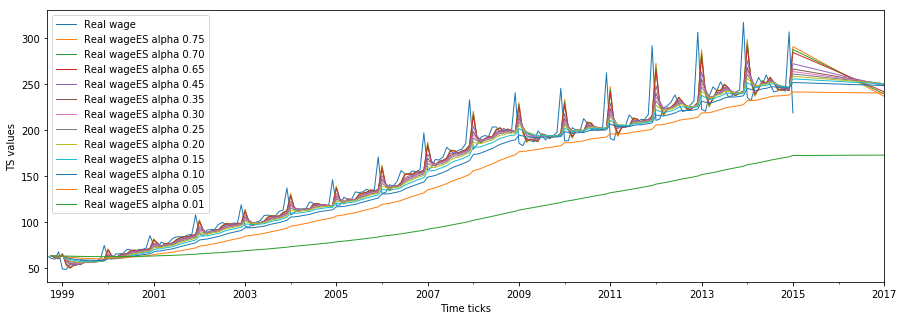

In [14]:
data[data.columns[0]].plot(linewidth=1.0)
for col in FRC_TS.keys():
    frc_ts = FRC_TS[col]
    frc_ts.columns = data.columns+col
    frc_ts[frc_ts.columns[0]].plot(figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

##### For best alpha

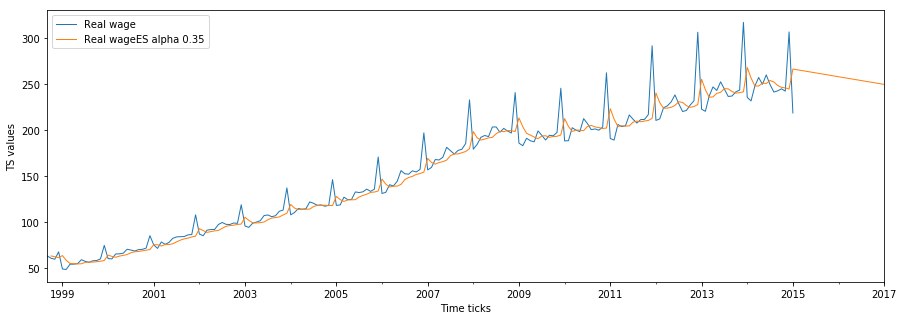

In [15]:
col = 'ES alpha 0.35'
data[data.columns[0]].plot(linewidth=1.0)
frc_ts = FRC_TS[col]
frc_ts.columns = data.columns+col
frc_ts[frc_ts.columns[0]].plot(figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

In [16]:
pred_Ts = ts['02-2016': '01-2017']

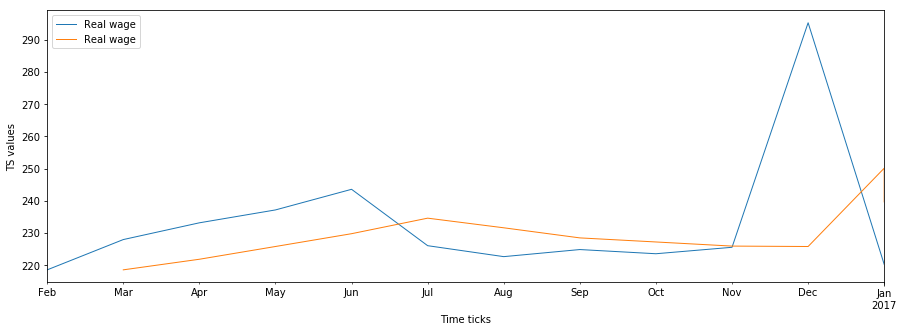

In [17]:
frc_ts = pd.DataFrame(index = pred_Ts.index.append(pd.date_range(pred_Ts.index[-1]+timedelta(1)
                                                              , pred_Ts.index[-1]+timedelta(h))
                                                  )
                      , columns = pred_Ts.columns)

for cntr in pred_Ts.columns:
    frc_ts[cntr] = ExponentialSmoothing(pred_Ts[cntr], h, {'alpha':0.35})

col = 'ES alpha 0.35'
pred_Ts[pred_Ts.columns[0]].plot(linewidth=1.0)

frc_ts.columns = pred_Ts.columns
frc_ts[frc_ts.columns[0]].plot(figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

In [18]:
ix = range(len(pred_Ts.index))
accuracy,_ = qualityMACAPE(pred_Ts.iloc[ix], frc_ts.iloc[ix])

In [19]:
accuracy

Real wage    0.063894
dtype: float64

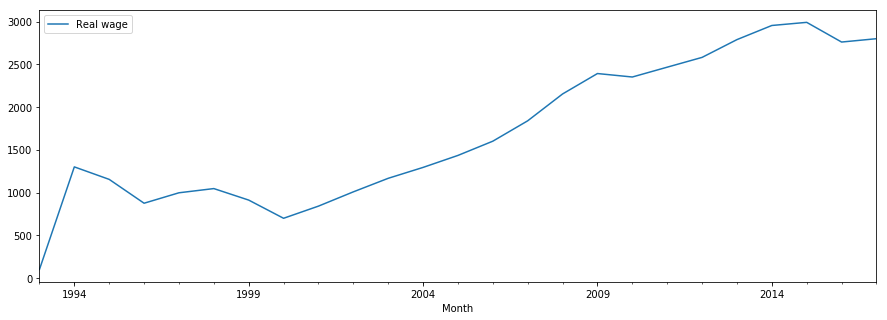

In [20]:
data_aggr = ts.resample('12M').sum()
data_aggr.plot(figsize=(15,5))

In [21]:
data = data_aggr['1998-09-01':'2015-01-01']

In [22]:
h = 1
ALPHA = [0.9, 0.75, 0.7, 0.65, 0.45, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01]
FRC_TS = dict()

for alpha in ALPHA:
    frc_ts = pd.DataFrame(index = data.index.append(pd.date_range(ts.index[-1]+timedelta(1)
                                                                  , ts.index[-1]+timedelta(h)))
                          , columns = data.columns)
    for cntr in data.columns:
        frc_ts[cntr] = ExponentialSmoothing(data[cntr], h, {'alpha':alpha})
    FRC_TS['ES alpha %.2f' % alpha] = frc_ts

QualityStr = pd.DataFrame(index = data.columns, columns = FRC_TS.keys())

ix = range(len(data.index))
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(data.iloc[ix], frc_ts.iloc[ix])

QualityStr

,ES alpha 0.90,ES alpha 0.75,ES alpha 0.70,ES alpha 0.65,ES alpha 0.45,ES alpha 0.35,ES alpha 0.30,ES alpha 0.25,ES alpha 0.20,ES alpha 0.15,ES alpha 0.10,ES alpha 0.05,ES alpha 0.01
Real wage,0.121631,0.135134,0.141102,0.14788,0.187363,0.219793,0.242612,0.271342,0.307296,0.353344,0.414003,0.496888,0.588348


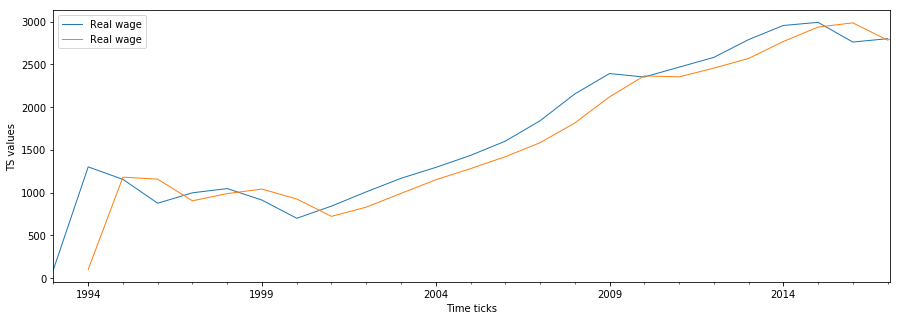

In [23]:
pred_Ts = data_aggr
frc_ts = pd.DataFrame(index = pred_Ts.index.append(pd.date_range(pred_Ts.index[-1]+timedelta(1)
                                                              , pred_Ts.index[-1]+timedelta(h))
                                                  )
                      , columns = pred_Ts.columns)

for cntr in pred_Ts.columns:
    frc_ts[cntr] = ExponentialSmoothing(pred_Ts[cntr], h, {'alpha':0.9})

col = 'ES alpha 0.35'
pred_Ts[pred_Ts.columns[0]].plot(linewidth=1.0)

frc_ts.columns = pred_Ts.columns
frc_ts[frc_ts.columns[0]].plot(figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

<h1 align="center">3. Winters model for Additive Seasonality (25%) </h1>
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of SES: is it better? 
* \*5) Conclude whether Winter's ES can be used for this TS?

In [24]:
def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l=x[0]
    s=np.array([.0] * p)

    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr] 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= 0
            
            l_1 = l
            l = alpha * (x[cntr] - s[cntr % p]) + (1 - alpha) * l_1 
            s[cntr%p] = delta * (x[cntr] - l_1) + (1 - delta) * s[cntr % p]
            
        FORECAST[cntr+h] = l + s[(cntr+h) % p]
    return FORECAST

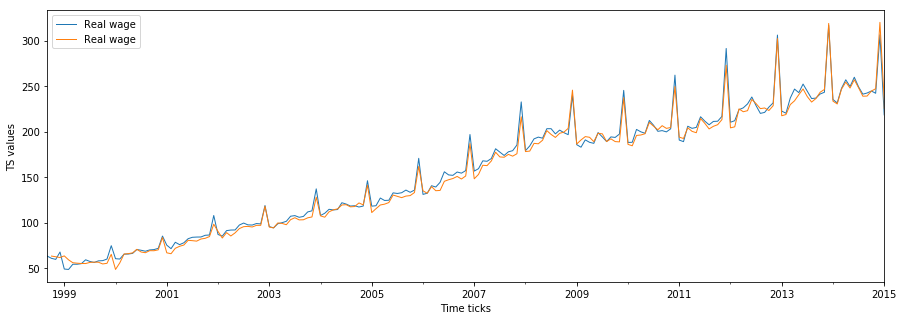

In [25]:
data = ts['1998-09-01':'2015-01-01']
h = 1
rng = pd.date_range(data.index[-1]+timedelta(1), data.index[-1]+timedelta(h))

w_frc_ts = pd.DataFrame(index = data.index.append(rng), columns = data.columns)
for cntr in data.columns:
    w_frc_ts[cntr] = WintersExponentialSmoothing(data[cntr], h, {'alpha':0.3, 'delta': 0.95, 'seasonality_period': 12})
    
data[data.columns[0]].plot(linewidth=1.0)
w_frc_ts[w_frc_ts.columns[0]].plot(figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

In [26]:
h = 1
params = [{'alpha':0.1, 'delta': 0.1, 'seasonality_period': 12},
          {'alpha':0.1, 'delta': 0.3, 'seasonality_period': 12},
          {'alpha':0.1, 'delta': 0.5, 'seasonality_period': 12},
          {'alpha':0.1, 'delta': 0.8, 'seasonality_period': 12},
          {'alpha':0.1, 'delta': 0.9, 'seasonality_period': 12},
          {'alpha':0.3, 'delta': 0.1, 'seasonality_period': 12},
          {'alpha':0.3, 'delta': 0.3, 'seasonality_period': 12},
          {'alpha':0.3, 'delta': 0.5, 'seasonality_period': 12},
          {'alpha':0.3, 'delta': 0.8, 'seasonality_period': 12},
          {'alpha':0.3, 'delta': 0.9, 'seasonality_period': 12},
          {'alpha':0.5, 'delta': 0.1, 'seasonality_period': 12},
          {'alpha':0.5, 'delta': 0.3, 'seasonality_period': 12},
          {'alpha':0.5, 'delta': 0.5, 'seasonality_period': 12},
          {'alpha':0.5, 'delta': 0.9, 'seasonality_period': 12}]
ix = range(len(data.index))

for param in params:
    rng = pd.date_range(data.index[-1]+timedelta(1), data.index[-1]+timedelta(h))

    w_frc_ts = pd.DataFrame(index = data.index.append(rng), columns = data.columns)
    for cntr in data.columns:
        w_frc_ts[cntr] = WintersExponentialSmoothing(data[cntr], h, param)
    print('alpha %f, delta %f, ses %d: quality %f' %(param['alpha'], 
                                                     param['delta'], 
                                                     param['seasonality_period'], 
                                                     qualityMACAPE(data.iloc[ix], w_frc_ts.iloc[ix])[0])
         )

alpha 0.100000, delta 0.100000, ses 12: quality 0.072456
alpha 0.100000, delta 0.300000, ses 12: quality 0.064860
alpha 0.100000, delta 0.500000, ses 12: quality 0.060230
alpha 0.100000, delta 0.800000, ses 12: quality 0.055233
alpha 0.100000, delta 0.900000, ses 12: quality 0.054163
alpha 0.300000, delta 0.100000, ses 12: quality 0.040418
alpha 0.300000, delta 0.300000, ses 12: quality 0.031568
alpha 0.300000, delta 0.500000, ses 12: quality 0.030172
alpha 0.300000, delta 0.800000, ses 12: quality 0.029954
alpha 0.300000, delta 0.900000, ses 12: quality 0.030214
alpha 0.500000, delta 0.100000, ses 12: quality 0.038509
alpha 0.500000, delta 0.300000, ses 12: quality 0.026613
alpha 0.500000, delta 0.500000, ses 12: quality 0.024040
alpha 0.500000, delta 0.900000, ses 12: quality 0.025920


#### Prediction

(Real wage    0.018188
dtype: float64,             Real wage
2016-01-01   6.985500
2016-02-01  11.277340
2016-03-01   3.321676
2016-04-01   4.110107
2016-05-01   5.815661
2016-06-01   2.992369
2016-07-01   4.976439
2016-08-01   3.244628
2016-09-01   0.718435
2016-10-01   4.779480
2016-11-01   1.078458
2016-12-01   1.212872
2017-01-01   2.399186
2017-01-02        NaN)


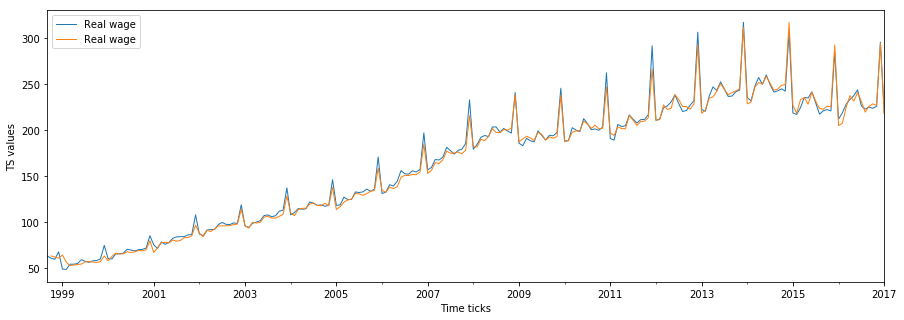

In [27]:
h = 1
data = ts['09-1998':'01-2017']
rng = pd.date_range(data.index[-1]+timedelta(1), data.index[-1]+timedelta(h))

w_frc_ts = pd.DataFrame(index = data.index.append(rng), columns = data.columns)
for cntr in data.columns:
    w_frc_ts[cntr] = WintersExponentialSmoothing(data[cntr], h, {'alpha':0.5, 'delta': 0.5, 'seasonality_period': 12})
    print(qualityMACAPE(data['01-2016':], w_frc_ts['01-2016':]))
data[data.columns[0]].plot(linewidth=1.0)
w_frc_ts[w_frc_ts.columns[0]].plot(figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

<h2 align="left">4. Theil-Wage model for TS with linear trend and seasonality (25%)</h2>
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [28]:
def TheilWageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    beta = Params['beta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l=x[0]
    b=0
    s=np.array([.0] * p)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr] 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= 0
            
            l_1 = l
            b_1 = b
            l = alpha * (x[cntr] - s[cntr % p]) + (1 - alpha) * (l_1 + b_1)
            b = beta * (l - l_1) + (1 - beta) * b_1
            s[cntr%p] = delta * (x[cntr] - l) + (1 - delta) * s[cntr % p]
            
        FORECAST[cntr+h] = l + b * h + s[(cntr+h) % p]
    return FORECAST

In [29]:
h = 1
ALPHA = [.1, .2, .3, .4, .5, .6, .7, .8]
BETA = [.1, .2, .3, .4, .5, .6, .7, .8]
DELTA = [.1, .2, .3, .4, .5, .6, .7, .8]
ix = range(len(data.index))

for alpha in ALPHA:
    for beta in BETA:
        for delta in DELTA:
            param = {'seasonality_period': 12}
            param['alpha'] = alpha
            param['delta'] = delta
            param['beta'] = beta
            
            rng = pd.date_range(data.index[-1]+timedelta(1), data.index[-1]+timedelta(h))

            w_frc_ts = pd.DataFrame(index = data.index.append(rng), columns = data.columns)
            for cntr in data.columns:
                w_frc_ts[cntr] = TheilWageExponentialSmoothing(data[cntr], h, param)
            print('alpha %f, beta %f, delta %f, ses %d: quality %f' % 
                  (alpha, beta, delta, param['seasonality_period'], qualityMACAPE(data.iloc[ix], w_frc_ts.iloc[ix])[0]))

alpha 0.100000, beta 0.100000, delta 0.100000, ses 12: quality 0.048148
alpha 0.100000, beta 0.100000, delta 0.200000, ses 12: quality 0.042301
alpha 0.100000, beta 0.100000, delta 0.300000, ses 12: quality 0.039392
alpha 0.100000, beta 0.100000, delta 0.400000, ses 12: quality 0.037724
alpha 0.100000, beta 0.100000, delta 0.500000, ses 12: quality 0.036554
alpha 0.100000, beta 0.100000, delta 0.600000, ses 12: quality 0.035823
alpha 0.100000, beta 0.100000, delta 0.700000, ses 12: quality 0.035552
alpha 0.100000, beta 0.100000, delta 0.800000, ses 12: quality 0.035667
alpha 0.100000, beta 0.200000, delta 0.100000, ses 12: quality 0.045288
alpha 0.100000, beta 0.200000, delta 0.200000, ses 12: quality 0.039348
alpha 0.100000, beta 0.200000, delta 0.300000, ses 12: quality 0.036619
alpha 0.100000, beta 0.200000, delta 0.400000, ses 12: quality 0.035105
alpha 0.100000, beta 0.200000, delta 0.500000, ses 12: quality 0.034233
alpha 0.100000, beta 0.200000, delta 0.600000, ses 12: quality 0

alpha 0.200000, beta 0.800000, delta 0.400000, ses 12: quality 0.045580
alpha 0.200000, beta 0.800000, delta 0.500000, ses 12: quality 0.062770
alpha 0.200000, beta 0.800000, delta 0.600000, ses 12: quality 0.113648
alpha 0.200000, beta 0.800000, delta 0.700000, ses 12: quality 0.311265
alpha 0.200000, beta 0.800000, delta 0.800000, ses 12: quality 0.724249
alpha 0.300000, beta 0.100000, delta 0.100000, ses 12: quality 0.040644
alpha 0.300000, beta 0.100000, delta 0.200000, ses 12: quality 0.033222
alpha 0.300000, beta 0.100000, delta 0.300000, ses 12: quality 0.028762
alpha 0.300000, beta 0.100000, delta 0.400000, ses 12: quality 0.025986
alpha 0.300000, beta 0.100000, delta 0.500000, ses 12: quality 0.024364
alpha 0.300000, beta 0.100000, delta 0.600000, ses 12: quality 0.023408
alpha 0.300000, beta 0.100000, delta 0.700000, ses 12: quality 0.023007
alpha 0.300000, beta 0.100000, delta 0.800000, ses 12: quality 0.022944
alpha 0.300000, beta 0.200000, delta 0.100000, ses 12: quality 0

alpha 0.400000, beta 0.700000, delta 0.400000, ses 12: quality 0.055707
alpha 0.400000, beta 0.700000, delta 0.500000, ses 12: quality 0.063988
alpha 0.400000, beta 0.700000, delta 0.600000, ses 12: quality 0.077002
alpha 0.400000, beta 0.700000, delta 0.700000, ses 12: quality 0.098202
alpha 0.400000, beta 0.700000, delta 0.800000, ses 12: quality 0.131034
alpha 0.400000, beta 0.800000, delta 0.100000, ses 12: quality 0.055508
alpha 0.400000, beta 0.800000, delta 0.200000, ses 12: quality 0.052372
alpha 0.400000, beta 0.800000, delta 0.300000, ses 12: quality 0.056530
alpha 0.400000, beta 0.800000, delta 0.400000, ses 12: quality 0.063078
alpha 0.400000, beta 0.800000, delta 0.500000, ses 12: quality 0.073079
alpha 0.400000, beta 0.800000, delta 0.600000, ses 12: quality 0.090681
alpha 0.400000, beta 0.800000, delta 0.700000, ses 12: quality 0.118226
alpha 0.400000, beta 0.800000, delta 0.800000, ses 12: quality 0.162208
alpha 0.500000, beta 0.100000, delta 0.100000, ses 12: quality 0

alpha 0.600000, beta 0.600000, delta 0.100000, ses 12: quality 0.061024
alpha 0.600000, beta 0.600000, delta 0.200000, ses 12: quality 0.050494
alpha 0.600000, beta 0.600000, delta 0.300000, ses 12: quality 0.044840
alpha 0.600000, beta 0.600000, delta 0.400000, ses 12: quality 0.042483
alpha 0.600000, beta 0.600000, delta 0.500000, ses 12: quality 0.042403
alpha 0.600000, beta 0.600000, delta 0.600000, ses 12: quality 0.043467
alpha 0.600000, beta 0.600000, delta 0.700000, ses 12: quality 0.045285
alpha 0.600000, beta 0.600000, delta 0.800000, ses 12: quality 0.047505
alpha 0.600000, beta 0.700000, delta 0.100000, ses 12: quality 0.064268
alpha 0.600000, beta 0.700000, delta 0.200000, ses 12: quality 0.052983
alpha 0.600000, beta 0.700000, delta 0.300000, ses 12: quality 0.046497
alpha 0.600000, beta 0.700000, delta 0.400000, ses 12: quality 0.043401
alpha 0.600000, beta 0.700000, delta 0.500000, ses 12: quality 0.042462
alpha 0.600000, beta 0.700000, delta 0.600000, ses 12: quality 0

alpha 0.800000, beta 0.400000, delta 0.700000, ses 12: quality 0.040675
alpha 0.800000, beta 0.400000, delta 0.800000, ses 12: quality 0.039017
alpha 0.800000, beta 0.500000, delta 0.100000, ses 12: quality 0.068921
alpha 0.800000, beta 0.500000, delta 0.200000, ses 12: quality 0.062509
alpha 0.800000, beta 0.500000, delta 0.300000, ses 12: quality 0.056953
alpha 0.800000, beta 0.500000, delta 0.400000, ses 12: quality 0.052084
alpha 0.800000, beta 0.500000, delta 0.500000, ses 12: quality 0.048309
alpha 0.800000, beta 0.500000, delta 0.600000, ses 12: quality 0.045368
alpha 0.800000, beta 0.500000, delta 0.700000, ses 12: quality 0.043060
alpha 0.800000, beta 0.500000, delta 0.800000, ses 12: quality 0.041213
alpha 0.800000, beta 0.600000, delta 0.100000, ses 12: quality 0.071795
alpha 0.800000, beta 0.600000, delta 0.200000, ses 12: quality 0.065638
alpha 0.800000, beta 0.600000, delta 0.300000, ses 12: quality 0.060274
alpha 0.800000, beta 0.600000, delta 0.400000, ses 12: quality 0

(Real wage    0.022111
dtype: float64,             Real wage
2016-01-01  10.015226
2016-02-01  13.972604
2016-03-01   4.160222
2016-04-01   2.152996
2016-05-01   7.611094
2016-06-01   3.456060
2016-07-01   5.476784
2016-08-01   2.154749
2016-09-01   1.640878
2016-10-01   6.062960
2016-11-01   2.326254
2016-12-01   0.751568
2017-01-01   3.928303
2017-01-02        NaN)


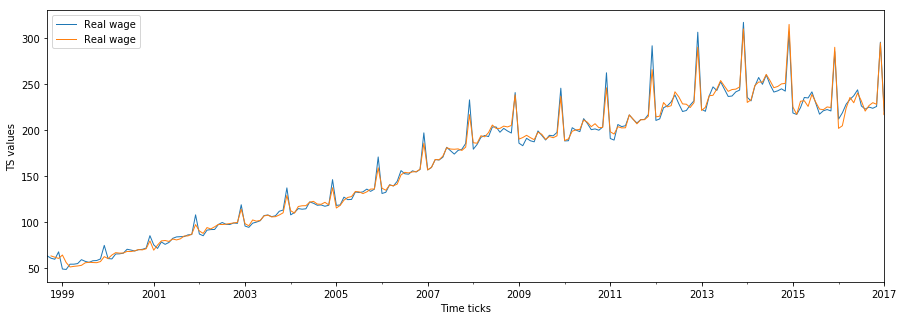

In [30]:
data = ts['1998-09-01':'2017-01-01']
h = 1
rng = pd.date_range(data.index[-1]+timedelta(1), data.index[-1]+timedelta(h))

w_frc_ts = pd.DataFrame(index = data.index.append(rng), columns = data.columns)
for cntr in data.columns:
    w_frc_ts[cntr] = TheilWageExponentialSmoothing(data[cntr], h, {'alpha':0.5, 'delta': 0.8, 'beta': 0.1, 'seasonality_period': 12})
    print(qualityMACAPE(data['01-2016':], w_frc_ts['01-2016':]))

data[data.columns[0]].plot(linewidth=1.0)
w_frc_ts[w_frc_ts.columns[0]].plot(figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

<h2 align="left"> 5. Non-additive model of ES (25%)</h2>
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it expetrly (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diver

In [31]:
def HoltWintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l=x[0]
    s=np.array([1.0] * p)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr] 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= 0
            
            l_1 = l
            l = alpha * (x[cntr] / s[cntr % p]) + (1 - alpha) * l_1
            s[cntr%p] = delta * (x[cntr] / l) + (1 - delta) * s[cntr % p]
            
        FORECAST[cntr+h] = l * s[(cntr+h) % p]
    return FORECAST

In [32]:
data = ts['1998-09-01':'2015-01-01']
h = 1
ALPHA = [.1, .2, .3, .4, .5, .6, .7, .8]
DELTA = [.1, .2, .3, .4, .5, .6, .7, .8]
ix = range(len(data.index))

for alpha in ALPHA:
    for delta in DELTA:
        param = {'seasonality_period': 12}
        param['alpha'] = alpha
        param['delta'] = delta

        rng = pd.date_range(data.index[-1]+timedelta(1), data.index[-1]+timedelta(h))

        w_frc_ts = pd.DataFrame(index = data.index.append(rng), columns = data.columns)
        for cntr in data.columns:
            w_frc_ts[cntr] = HoltWintersExponentialSmoothing(data[cntr], h, param)
        print('alpha %f, delta %f, ses %d: quality %f' % 
              (alpha, delta, param['seasonality_period'], qualityMACAPE(data.iloc[ix], w_frc_ts.iloc[ix])[0]))

alpha 0.100000, delta 0.100000, ses 12: quality 0.072257
alpha 0.100000, delta 0.200000, ses 12: quality 0.068458
alpha 0.100000, delta 0.300000, ses 12: quality 0.065674
alpha 0.100000, delta 0.400000, ses 12: quality 0.063192
alpha 0.100000, delta 0.500000, ses 12: quality 0.060974
alpha 0.100000, delta 0.600000, ses 12: quality 0.059025
alpha 0.100000, delta 0.700000, ses 12: quality 0.057361
alpha 0.100000, delta 0.800000, ses 12: quality 0.055873
alpha 0.200000, delta 0.100000, ses 12: quality 0.045491
alpha 0.200000, delta 0.200000, ses 12: quality 0.042530
alpha 0.200000, delta 0.300000, ses 12: quality 0.041499
alpha 0.200000, delta 0.400000, ses 12: quality 0.040752
alpha 0.200000, delta 0.500000, ses 12: quality 0.040116
alpha 0.200000, delta 0.600000, ses 12: quality 0.039627
alpha 0.200000, delta 0.700000, ses 12: quality 0.039195
alpha 0.200000, delta 0.800000, ses 12: quality 0.038778
alpha 0.300000, delta 0.100000, ses 12: quality 0.038884
alpha 0.300000, delta 0.200000,

(Real wage    0.016056
dtype: float64,             Real wage
2016-01-01   2.897752
2016-02-01   9.177310
2016-03-01   1.867480
2016-04-01   2.893937
2016-05-01   7.092759
2016-06-01   3.551010
2016-07-01   5.277114
2016-08-01   2.419320
2016-09-01   0.782435
2016-10-01   4.806361
2016-11-01   1.225188
2016-12-01   1.714061
2017-01-01   3.605235
2017-01-02        NaN)


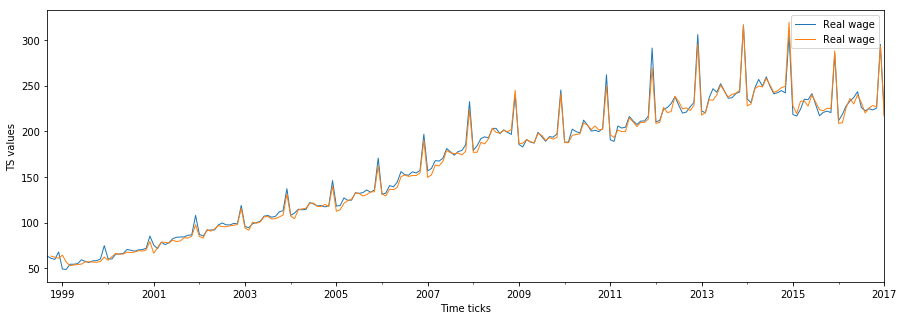

In [33]:
data = ts['1998-09-01':'2017-01-01']
h = 1
rng = pd.date_range(data.index[-1]+timedelta(1), data.index[-1]+timedelta(h))

w_frc_ts = pd.DataFrame(index = data.index.append(rng), columns = data.columns)
for cntr in data.columns:
    w_frc_ts[cntr] = HoltWintersExponentialSmoothing(data[cntr], h, {'alpha':0.5, 'delta': 0.8, 'seasonality_period': 12})
    print(qualityMACAPE(data['01-2016':], w_frc_ts['01-2016':]))

data[data.columns[0]].plot(linewidth=1.0)
w_frc_ts[w_frc_ts.columns[0]].plot(figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()